**Submitted by:**

   *Arnau Alabort*
   
   *Álvaro Gallego*

In [135]:
library(arules)
library(arulesViz)
library(plyr)

In [136]:
id <- c(0:49)
food <- c("Chocolate Cake","Lemon Cake","Casino Cake","Opera Cake", "Strawberry Cake", "Truffle Cake", "Chocolate Eclair", "Coffee Eclair", "Vanilla Eclair", "Napolean Cake", "Almond Tart", "Apple Pie", "Apple Tart","Apricot Tart", "Berry Tart", "Blackberry Tart", "Blueberry Tart", "Chocolate Tart", "Cherry Tart", "Lemon Tart", "Pecan Tart", "Ganache Cookie", "Gongolais Cookie", "Raspberry Cookie", "Lemon Cookie", "Chocolate Meringue", "Vanilla Meringue", "Marzipan Cookie", "Tuile Cookie", "Walnut Cookie", "Almond Croissant", "Apple Croissant", "Apricot Croissant", "Cheese Croissant", "Chocolate Croissant", "Apricot Danish", "Apple Danish", "Almond Twist", "Almond Bear_Claw", "Blueberry Danish", "Lemon Lemonade", "Raspberry Lemonade", "Orange Juice", "Green Tea", "Bottled Water", "Hot Coffee", "Chocolate Coffee", "Vanilla Frappucino", "Cherry Soda", "Single Espresso")

df <- data.frame(id, food)


In [137]:
head(df)

id,food
0,Chocolate Cake
1,Lemon Cake
2,Casino Cake
3,Opera Cake
4,Strawberry Cake
5,Truffle Cake


In [138]:
backery = read.table('backery_1000.csv',header = FALSE,col.names = c('trans',food),sep = ',')

In [139]:
head(backery)

trans,Chocolate.Cake,Lemon.Cake,Casino.Cake,Opera.Cake,Strawberry.Cake,Truffle.Cake,Chocolate.Eclair,Coffee.Eclair,Vanilla.Eclair,⋯,Lemon.Lemonade,Raspberry.Lemonade,Orange.Juice,Green.Tea,Bottled.Water,Hot.Coffee,Chocolate.Coffee,Vanilla.Frappucino,Cherry.Soda,Single.Espresso
1,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


In [140]:
backery[,2:51] <- ifelse(backery[,2:51] == 0, FALSE, TRUE)

In [141]:
head(backery)

trans,Chocolate.Cake,Lemon.Cake,Casino.Cake,Opera.Cake,Strawberry.Cake,Truffle.Cake,Chocolate.Eclair,Coffee.Eclair,Vanilla.Eclair,⋯,Lemon.Lemonade,Raspberry.Lemonade,Orange.Juice,Green.Tea,Bottled.Water,Hot.Coffee,Chocolate.Coffee,Vanilla.Frappucino,Cherry.Soda,Single.Espresso
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
2,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


In [142]:
backery = backery[-1]

In [143]:
tran = as(backery, 'transactions')

In [144]:
tran

transactions in sparse format with
 1000 transactions (rows) and
 50 items (columns)

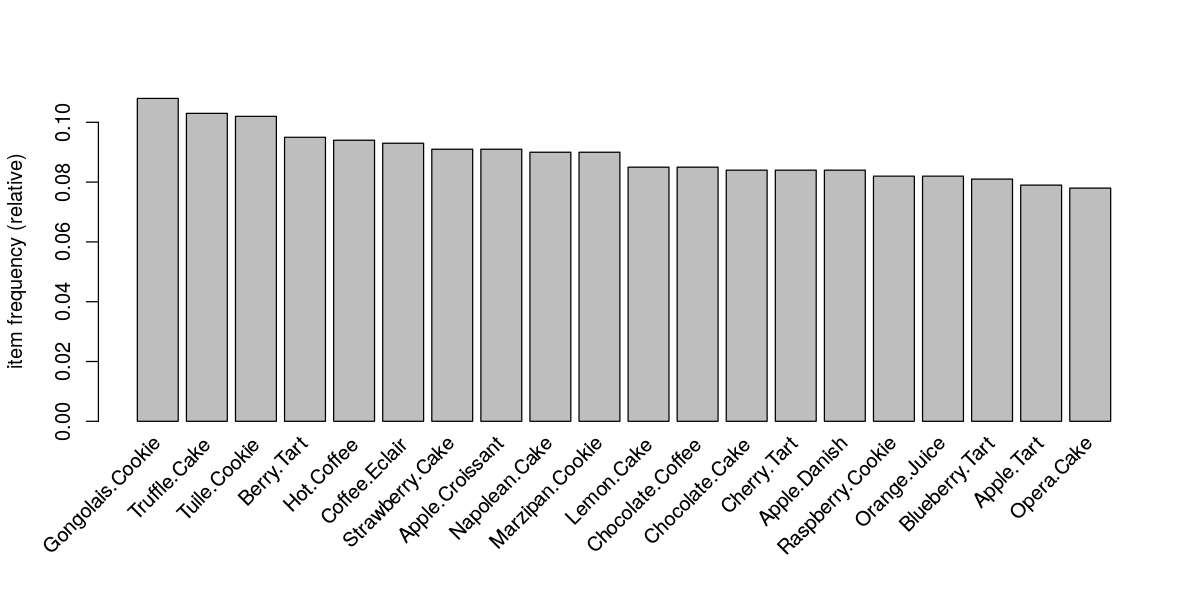

In [145]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=5)
itemFrequencyPlot(tran, topN = 20)

In [146]:
inspect(tran[1:5])

    items              transactionID
[1] {Coffee.Eclair,                 
     Blackberry.Tart,               
     Bottled.Water,                 
     Single.Espresso}              1
[2] {Lemon.Cake,                    
     Lemon.Tart}                   2
[3] {Lemon.Cake,                    
     Lemon.Tart}                   3
[4] {Opera.Cake,                    
     Strawberry.Cake,               
     Blackberry.Tart,               
     Cherry.Tart,                   
     Apricot.Danish,                
     Bottled.Water}                4
[5] {Casino.Cake,                   
     Strawberry.Cake,               
     Coffee.Eclair,                 
     Napolean.Cake,                 
     Raspberry.Cookie}             5


In [147]:
backery_rules <- apriori(tran,parameter = list(sup = 0.01, conf = 0.90,target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [148]:
summary(backery_rules)

set of 68 rules

rule length distribution (lhs + rhs):sizes
 3  4  5 
42 22  4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   3.000   3.441   4.000   5.000 

summary of quality measures:
    support          confidence          lift           count      
 Min.   :0.01800   Min.   :0.9000   Min.   :10.01   Min.   :18.00  
 1st Qu.:0.01900   1st Qu.:0.9394   1st Qu.:11.87   1st Qu.:19.00  
 Median :0.02400   Median :0.9661   Median :13.16   Median :24.00  
 Mean   :0.02538   Mean   :0.9661   Mean   :13.10   Mean   :25.38  
 3rd Qu.:0.02900   3rd Qu.:1.0000   3rd Qu.:14.39   3rd Qu.:29.00  
 Max.   :0.04000   Max.   :1.0000   Max.   :19.61   Max.   :40.00  

mining info:
 data ntransactions support confidence
 tran          1000    0.01        0.9

# Evaluate model

In [149]:
# look at the first three rules
inspect(backery_rules[1:3])

    lhs                                   rhs                  support
[1] {Chocolate.Tart,Walnut.Cookie}     => {Vanilla.Frappucino} 0.018  
[2] {Walnut.Cookie,Vanilla.Frappucino} => {Chocolate.Tart}     0.018  
[3] {Blackberry.Tart,Single.Espresso}  => {Coffee.Eclair}      0.023  
    confidence lift     count
[1] 1.0000000  13.51351 18   
[2] 1.0000000  19.60784 18   
[3] 0.9583333  10.30466 23   


# Lift
The lift is defined as the likelihood of the itemset Ybeing purchased when item X is purchased while taking into account the popularity of  Y.If the value of lift is greater than 1, it means that the itemset Y is likely to be bought with itemset X, while a value less than 1 implies that itemset Y is unlikely to be bought if the itemset X is bought.

In [150]:
# sorting backery rules by lift
main_rules_backeryrules = inspect(sort(backery_rules, by = "lift")[1:5])

    lhs                     rhs              support confidence     lift count
[1] {Walnut.Cookie,                                                           
     Vanilla.Frappucino} => {Chocolate.Tart}   0.018          1 19.60784    18
[2] {Coffee.Eclair,                                                           
     Apple.Pie,                                                               
     Hot.Coffee}         => {Almond.Twist}     0.024          1 15.38462    24
[3] {Raspberry.Cookie,                                                        
     Raspberry.Lemonade} => {Lemon.Cookie}     0.029          1 15.15152    29
[4] {Lemon.Lemonade,                                                          
     Raspberry.Lemonade,                                                      
     Green.Tea}          => {Lemon.Cookie}     0.019          1 15.15152    19
[5] {Lemon.Cookie,                                                            
     Raspberry.Lemonade,                            

In [151]:
backery_rules2 <- apriori(tran,parameter = list(sup = 0.1, conf = 0.90,target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [152]:
summary(backery_rules2)

set of 0 rules


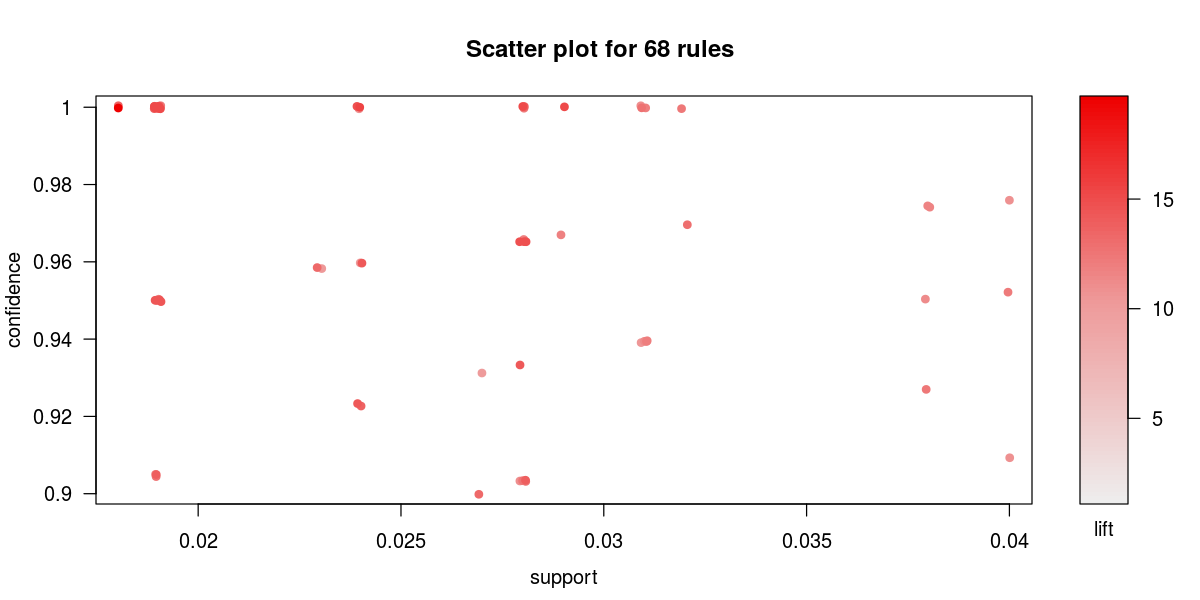

In [153]:
options(repr.plot.width=10, repr.plot.height=5)
plot(backery_rules)

# We are going to preprocess the data and try to find insights separating those sells with more or less than 4 products

In [154]:
backery_trans_greater4= backery[(rowSums(backery))>4,]
tran_greater4 = as(backery_trans_greater4, 'transactions')
backery_rules_greater4 <- apriori(tran_greater4,parameter = list(sup = 0.01, conf = 0.90,target="rules"))
backery_rules_greater4


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 224 transaction(s)] done [0.00s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [100 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 100 rules 

In [155]:
backery_trans_less4= backery[(rowSums(backery))<4,]
tran_less4 = as(backery_trans_less4, 'transactions')
backery_rules_less4 <- apriori(tran_less4,parameter = list(sup = 0.01, conf = 0.90,target="rules"))
backery_rules_less4


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 560 transaction(s)] done [0.00s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [13 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 13 rules 

In [156]:
main_rules_backeryrules_greater4 = inspect(sort(backery_rules_greater4, by = "lift")[1:5])

    lhs                     rhs                 support confidence      lift count
[1] {Walnut.Cookie,                                                               
     Vanilla.Frappucino} => {Chocolate.Tart} 0.01785714          1 13.176471     4
[2] {Coffee.Eclair,                                                               
     Almond.Twist,                                                                
     Hot.Coffee}         => {Apple.Pie}      0.02678571          1 11.200000     6
[3] {Cherry.Tart,                                                                 
     Walnut.Cookie,                                                               
     Apricot.Danish}     => {Opera.Cake}     0.01339286          1  9.739130     3
[4] {Berry.Tart,                                                                  
     Vanilla.Frappucino} => {Bottled.Water}  0.01339286          1  9.333333     3
[5] {Lemon.Cake,                                                                  
    

In [157]:
main_rules_backeryrules_less4 = inspect(sort(backery_rules_less4, by = "lift")[1:5])

    lhs                                   rhs                  support   
[1] {Apple.Croissant,Apple.Danish}     => {Apple.Tart}         0.01250000
[2] {Walnut.Cookie,Vanilla.Frappucino} => {Chocolate.Tart}     0.01964286
[3] {Apple.Tart,Apple.Danish}          => {Apple.Croissant}    0.01250000
[4] {Chocolate.Tart,Walnut.Cookie}     => {Vanilla.Frappucino} 0.01964286
[5] {Chocolate.Cake,Chocolate.Coffee}  => {Casino.Cake}        0.03928571
    confidence lift     count
[1] 1.0000000  28.00000  7   
[2] 1.0000000  22.40000 11   
[3] 1.0000000  20.00000  7   
[4] 1.0000000  18.66667 11   
[5] 0.9166667  16.04167 22   


In [158]:
main_rules_backeryrules = inspect(sort(backery_rules, by = "lift")[1:5])

    lhs                     rhs              support confidence     lift count
[1] {Walnut.Cookie,                                                           
     Vanilla.Frappucino} => {Chocolate.Tart}   0.018          1 19.60784    18
[2] {Coffee.Eclair,                                                           
     Apple.Pie,                                                               
     Hot.Coffee}         => {Almond.Twist}     0.024          1 15.38462    24
[3] {Raspberry.Cookie,                                                        
     Raspberry.Lemonade} => {Lemon.Cookie}     0.029          1 15.15152    29
[4] {Lemon.Lemonade,                                                          
     Raspberry.Lemonade,                                                      
     Green.Tea}          => {Lemon.Cookie}     0.019          1 15.15152    19
[5] {Lemon.Cookie,                                                            
     Raspberry.Lemonade,                            

# Conclusion

For the small sells we can observe that we can infer better rules  (better lift). Also, we can see that the unique common rule between both  main rules is the **{Walnut.Cookie,Vanilla.Frappucino} => {Chocolate.Tart}**,which is in fact the best rule obtained before for the whole set what can probalby means that this is a very good rule to take into acount. So one good practice for the bakery could be to sell these products in a bundle.